# Evolutionary Algorithm - Natural Computing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import string
import seaborn
import pandas as pd
from scipy.spatial.distance import hamming
import math

## Task 4

### Read data

In [ ]:
#In order to run, needs the file-tsp.txt file and a280.tsp

In [3]:
city_coordinates = pd.read_csv("file-tsp.txt", header=None, names=['x', 'y'], sep='   ', engine='python')

In [4]:
data = []
with open('a280.tsp', 'r') as file:
    found_keyword = False
    for line in file:
        if 'NODE_COORD_SECTION' in line:
            found_keyword = True
            break
    if found_keyword:
        for line in file:
            elements = line.strip().split()
            if elements[0] == 'EOF':
                break
            x = int(elements[1])
            y = int(elements[2])
            data.append((x, y))
    city_coordinates2 = pd.DataFrame(data, columns=['x', 'y'])

### Functions

In [5]:
def distance_between_cities(city1, city2):
    return math.sqrt((city2['x'] - city1['x'])**2 + (city2['y'] - city1['y'])**2)

In [6]:
def path_length(path, coordinates):
    d = 0
    for c in range(len(path) - 1):
        d += distance_between_cities(coordinates.iloc[path[c] - 1], coordinates.iloc[path[c + 1] - 1])
    return d

In [7]:
def fitness(path, coordinates):
    f = 0
    for c in range(len(path) - 1):
        f += distance_between_cities(coordinates.iloc[path[c] - 1], coordinates.iloc[path[c + 1] - 1])
    return 1/f

In [8]:
def generate_path(number_cities):
    cities=[i for i in range(number_cities)]
    return random.sample(cities, number_cities)

In [9]:
def select_parent(population, K, coordinates):
    subset = random.sample(population, k=K)
    best_fitness = fitness(subset[0], coordinates)
    best_candidate = subset[0]

    for s in subset:
        f = fitness(s, coordinates)
        if best_fitness > f:
            best_fitness = f
            best_candidate = s
    return best_candidate

In [10]:
def generate_children(parent1, parent2, mu, pc):
    child1, child2 = crossover(parent1, parent2, pc)
    child1 = mutation(child1, mu)
    child2 = mutation(child2, mu)
    return child1, child2

def crossover(parent1, parent2, pc):
    prob = random.random()
    child1 = []
    child2 = []
    if prob < pc:
        crossover_point1 = random.randint(0, len(parent1) - 1)
        crossover_point2 = random.randint(0, len(parent1) - 1)
        crossover_point1, crossover_point2 = min(crossover_point1, crossover_point2), max(crossover_point1, crossover_point2)
        child1 = parent1.copy()
        child2 = parent2.copy()

        child1 = fill_gaps(parent2, child1, crossover_point1, crossover_point2)
        child2 = fill_gaps(parent1, child2, crossover_point1, crossover_point2)
    return child1, child2

def fill_gaps(parent, child, crossover_point1, crossover_point2):
    leftover_cities = []
    for city in parent:
        if city not in child[crossover_point1:crossover_point2 + 1]:
            leftover_cities.append(city)
    child[:crossover_point1] = leftover_cities[:crossover_point1]
    child[crossover_point2 + 1:] = leftover_cities[crossover_point1:]
    return child

def mutation(path, mu):
    prob = random.random()
    if prob < mu:
        index1 = random.randint(0, len(path) - 1)
        index2 = random.randint(0, len(path) - 1)
        path[index1], path[index2] = path[index2], path[index1]
    return path


In [11]:
def find_best_solution(population, coordinates):
    best_fitness = fitness(population[0], coordinates)
    best_solution = population[0]
    for p in population:
        f = fitness(p, coordinates)
        if f > best_fitness:
            best_fitness = f
            best_solution = p
    return best_fitness, best_solution

In [12]:
def show_path(coordinates, path):
    coordinates.plot.scatter(x="x", y="y")
    for index in range(len(path)-1):
        point1 = coordinates.iloc[[path[index]-1]]
        point1_x = float(point1["x"])
        point1_y = float(point1["y"])
        point2 = coordinates.iloc[[path[index+1]-1]]
        point2_x = float(point2["x"])
        point2_y = float(point2["y"])
        plt.plot([point1_x, point2_x], [point1_y, point2_y])
    plt.show()

### Simple EA algorithm

In [13]:
def simulation(N, number_cities, generations, coordinates, K, mu, pc):
    population = [generate_path(number_cities) for c in range(N)]
    epochs = 0
    retVal1, retVal2 = find_best_solution(population, coordinates)
    while epochs < generations:
        new_generation = []
        for i in range(int(N/2)):
            parent1 = select_parent(population, K, coordinates)
            parent2 = select_parent(population, K, coordinates)
            new_generation.extend(generate_children(parent1, parent2, mu, pc))
        population = new_generation
        epochs += 1

    best_fitness, best_solution = find_best_solution(population, coordinates)
    return best_fitness, best_solution

In [12]:
#EA with 1500 generations
solutions1 = []
fitnesses1 = []

for i in range(10):
    number_cities = len(city_coordinates)
    N = 10
    generations = 1500
    K = 2
    mu = 0.2
    pc = 1

    best_fitness, best_solution = simulation(N, number_cities, generations, city_coordinates, K, mu, pc)
    solutions1.append(best_solution)
    fitnesses1.append(best_fitness)
    print(best_fitness)
    print(best_solution)

0.005944744022928767
[40, 36, 47, 46, 37, 0, 48, 49, 43, 42, 45, 41, 44, 33, 25, 30, 26, 23, 19, 16, 28, 29, 22, 17, 20, 13, 14, 8, 12, 18, 3, 6, 21, 24, 32, 31, 34, 39, 38, 35, 27, 9, 5, 1, 7, 4, 2, 10, 11, 15]
0.005196546988471654
[9, 1, 5, 30, 29, 28, 22, 19, 16, 3, 12, 23, 26, 39, 49, 48, 0, 43, 33, 21, 7, 11, 10, 18, 25, 41, 44, 45, 42, 37, 38, 35, 34, 31, 24, 27, 15, 4, 2, 6, 8, 14, 13, 32, 17, 20, 40, 36, 46, 47]
0.006363975443610236
[10, 7, 9, 1, 5, 4, 2, 11, 18, 21, 15, 24, 43, 37, 38, 35, 27, 42, 41, 39, 33, 31, 25, 26, 23, 29, 22, 32, 36, 44, 47, 46, 40, 28, 20, 14, 16, 19, 12, 6, 3, 8, 13, 17, 30, 34, 45, 0, 49, 48]
0.005433488169702478
[46, 40, 36, 28, 22, 7, 1, 9, 15, 27, 48, 49, 0, 45, 42, 43, 38, 35, 37, 34, 24, 21, 18, 12, 11, 10, 2, 4, 5, 19, 16, 17, 30, 26, 33, 25, 41, 44, 47, 39, 31, 23, 32, 29, 6, 3, 8, 14, 20, 13]
0.004788830005643572
[10, 15, 9, 7, 4, 5, 1, 2, 11, 6, 17, 24, 20, 28, 40, 46, 30, 29, 32, 26, 23, 22, 12, 16, 19, 18, 21, 25, 39, 41, 44, 47, 36, 37, 4

168.2158215968625
192.43547729260655
157.13448438963607
184.04383496702397
208.81927293754703
205.14320364914118
171.85365396065538
157.4103641736454
184.032846652661
166.07369771471448


C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point1_x = float(point1["x"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point1_y = float(point1["y"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point2_x = float(point2["x"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point2_y = float(point2["y"])


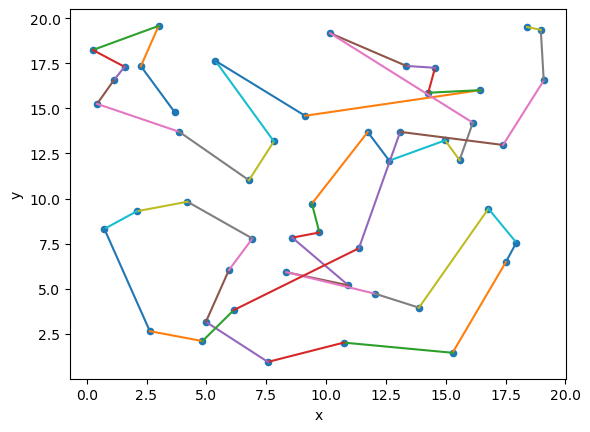

In [14]:
distances1 = []
for path in solutions1:
    length = path_length(path, city_coordinates)
    distances1.append(length)
    print(length)
    
show_path(city_coordinates, solutions1[2])

In [13]:
#EA with 10 generations
solutions2 = []
fitnesses2 = []

for i in range(10):
    number_cities = len(city_coordinates)
    N = 10
    generations = 10
    K = 2
    mu = 0.2
    pc = 1

    best_fitness, best_solution = simulation(N, number_cities, generations, city_coordinates, K, mu, pc)
    solutions2.append(best_solution)
    fitnesses2.append(best_fitness)
    print(best_fitness)
    print(best_solution)

0.0025277273037955
[26, 16, 3, 7, 9, 2, 44, 30, 32, 43, 37, 34, 45, 0, 1, 27, 49, 4, 11, 29, 8, 13, 41, 20, 23, 21, 15, 5, 12, 14, 36, 38, 6, 22, 42, 19, 17, 47, 40, 46, 33, 25, 39, 48, 35, 24, 28, 10, 31, 18]
0.0025195480844502874
[8, 34, 44, 49, 48, 0, 21, 31, 41, 16, 28, 25, 17, 5, 15, 6, 24, 27, 37, 22, 32, 29, 39, 43, 38, 18, 7, 30, 40, 45, 42, 46, 26, 47, 3, 12, 1, 2, 20, 13, 36, 9, 33, 14, 10, 11, 19, 4, 35, 23]
0.002490781467819821
[13, 17, 1, 7, 2, 25, 30, 35, 33, 42, 27, 37, 12, 16, 34, 31, 3, 43, 49, 21, 46, 22, 23, 11, 8, 6, 4, 9, 41, 39, 24, 47, 48, 38, 10, 44, 45, 29, 5, 19, 36, 32, 40, 28, 0, 20, 14, 18, 15, 26]
0.002244622892981659
[48, 26, 45, 38, 15, 29, 20, 4, 0, 40, 37, 30, 23, 10, 27, 5, 6, 1, 22, 32, 16, 18, 3, 14, 24, 35, 41, 47, 8, 43, 12, 9, 17, 13, 33, 25, 31, 49, 19, 34, 2, 11, 7, 21, 42, 44, 28, 36, 46, 39]
0.0022770590112907905
[20, 5, 24, 12, 15, 33, 29, 34, 16, 28, 17, 36, 46, 27, 41, 38, 43, 39, 21, 14, 6, 0, 32, 30, 10, 45, 7, 2, 47, 37, 40, 8, 23, 1, 3

395.61229508359287
396.8965729098911
401.4804240836508
445.5091334614536
439.1629707625068
437.1831502584245
395.04890360214245
414.3655283597969
373.9971852645528
445.90117156206014


C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point1_x = float(point1["x"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point1_y = float(point1["y"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point2_x = float(point2["x"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point2_y = float(point2["y"])


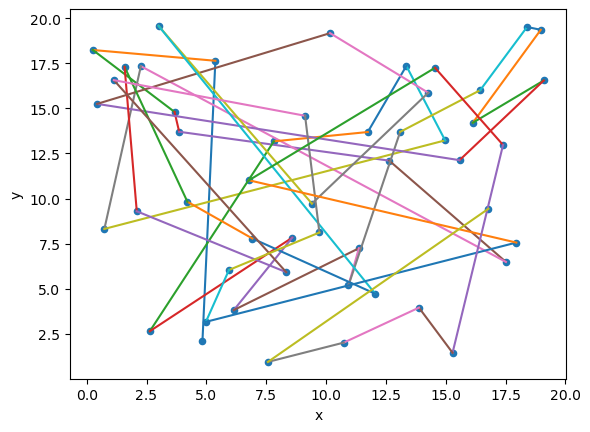

In [15]:
distances2 = []
for path in solutions2:
    length = path_length(path, city_coordinates)
    distances2.append(length)
    print(length)
    
show_path(city_coordinates, solutions2[8])

In [27]:
#EA for a280 dataset with 10 generations
solutions3 = []
fitnesses3 = []

for i in range(10):
    number_cities = len(city_coordinates2)
    N = 10
    generations = 10
    K = 2
    mu = 0.2
    pc = 1

    best_fitness, best_solution = simulation(N, number_cities, generations, city_coordinates2, K, mu, pc)
    solutions3.append(best_solution)
    fitnesses3.append(best_fitness)
    print(best_fitness)
    print(best_solution)

3.312658266665668e-05
[70, 108, 49, 7, 274, 48, 37, 56, 64, 97, 230, 143, 204, 100, 44, 71, 103, 16, 51, 45, 77, 18, 29, 268, 224, 245, 33, 193, 212, 250, 21, 164, 165, 46, 223, 38, 135, 177, 232, 5, 3, 218, 225, 198, 129, 244, 259, 120, 238, 149, 62, 197, 9, 256, 117, 194, 147, 222, 22, 199, 189, 253, 229, 137, 272, 236, 186, 10, 105, 221, 214, 102, 61, 31, 273, 52, 228, 263, 76, 169, 39, 270, 257, 207, 96, 209, 219, 142, 239, 237, 13, 134, 89, 85, 43, 53, 58, 127, 146, 125, 26, 154, 79, 157, 203, 201, 112, 190, 231, 30, 156, 55, 47, 170, 182, 188, 158, 59, 27, 279, 17, 42, 133, 264, 162, 271, 65, 191, 111, 83, 159, 84, 106, 19, 275, 66, 8, 192, 41, 254, 121, 145, 116, 227, 261, 23, 11, 2, 266, 196, 113, 57, 187, 0, 1, 25, 32, 12, 34, 50, 173, 206, 15, 14, 153, 155, 132, 124, 20, 80, 200, 172, 185, 60, 130, 104, 131, 276, 98, 114, 176, 202, 136, 99, 269, 260, 278, 90, 118, 69, 215, 166, 144, 216, 267, 24, 246, 82, 213, 217, 148, 241, 255, 95, 208, 87, 72, 160, 115, 67, 252, 277, 161, 

3.21725071313557e-05
[108, 118, 268, 75, 163, 123, 208, 169, 165, 145, 231, 226, 279, 221, 17, 253, 264, 166, 132, 255, 259, 95, 234, 26, 200, 36, 59, 126, 271, 21, 15, 87, 187, 0, 137, 213, 139, 102, 194, 133, 7, 96, 43, 186, 176, 37, 117, 80, 128, 178, 127, 160, 101, 138, 24, 40, 53, 114, 230, 49, 124, 191, 158, 214, 203, 222, 151, 73, 150, 229, 190, 189, 174, 18, 210, 100, 275, 196, 55, 237, 236, 201, 249, 276, 266, 14, 113, 10, 263, 260, 1, 63, 12, 20, 99, 84, 246, 129, 252, 94, 81, 182, 233, 256, 46, 104, 224, 199, 211, 88, 74, 267, 50, 52, 269, 76, 105, 131, 4, 103, 77, 235, 262, 106, 54, 71, 130, 109, 62, 86, 83, 56, 78, 251, 219, 29, 152, 23, 67, 92, 177, 39, 216, 265, 30, 22, 188, 42, 45, 82, 119, 135, 181, 197, 142, 254, 155, 116, 107, 85, 125, 243, 217, 156, 122, 19, 5, 61, 28, 245, 134, 180, 140, 34, 141, 223, 171, 64, 144, 48, 70, 121, 274, 31, 89, 66, 60, 277, 209, 215, 148, 27, 2, 115, 6, 228, 58, 35, 168, 240, 79, 175, 72, 97, 179, 162, 44, 185, 112, 147, 161, 250, 241,

30187.23694087959
30214.952207915812
31314.276601463607
31193.32868165678
31624.529216895535
30082.939538992243
30585.892526311345
31082.439298782174
31567.069864859226
30692.8991940147


C:\Users\Aliza\AppData\Local\Temp\ipykernel_8424\3750131850.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point1_x = float(point1["x"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_8424\3750131850.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point1_y = float(point1["y"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_8424\3750131850.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point2_x = float(point2["x"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_8424\3750131850.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point2_y = float(point2["y"])


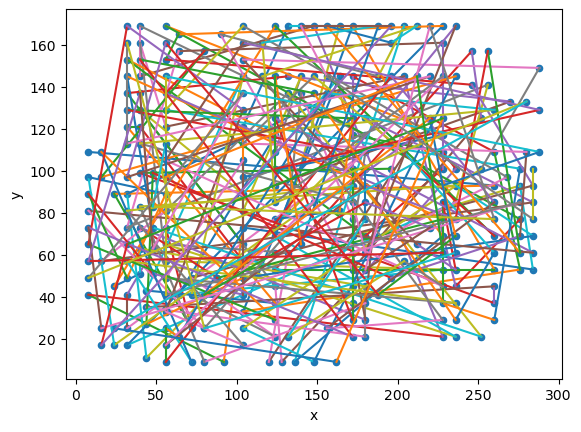

In [16]:
distances3 = []
for path in solutions3:
    length = path_length(path, city_coordinates2)
    distances3.append(length)
    print(length)
    
show_path(city_coordinates2, solutions3[5])

In [12]:
#EA for a280 dataset with 1500 generations
solutions4 = []
fitnesses4 = []

for i in range(10):
    number_cities = len(city_coordinates2)
    N = 10
    generations = 1500
    K = 2
    mu = 0.2
    pc = 1

    best_fitness, best_solution = simulation(N, number_cities, generations, city_coordinates2, K, mu, pc)
    solutions4.append(best_solution)
    fitnesses4.append(best_fitness)
    print(best_fitness)
    print(best_solution)

5.916555817307991e-05
[183, 185, 111, 145, 200, 237, 251, 247, 32, 198, 137, 206, 227, 254, 13, 236, 232, 243, 242, 244, 246, 260, 127, 121, 219, 235, 0, 250, 205, 168, 99, 44, 153, 194, 222, 221, 94, 98, 173, 182, 158, 115, 60, 57, 263, 274, 255, 193, 191, 228, 240, 239, 241, 1, 272, 271, 273, 6, 7, 11, 186, 184, 245, 278, 2, 231, 279, 261, 75, 74, 114, 170, 202, 266, 150, 161, 178, 214, 139, 201, 143, 196, 180, 16, 155, 152, 175, 108, 112, 169, 89, 88, 30, 34, 38, 45, 47, 51, 50, 69, 26, 212, 224, 197, 267, 226, 252, 277, 148, 192, 220, 190, 100, 167, 116, 149, 257, 15, 9, 8, 39, 56, 78, 77, 83, 107, 269, 14, 4, 264, 162, 85, 101, 72, 81, 174, 164, 199, 249, 211, 234, 223, 189, 110, 35, 122, 156, 29, 27, 28, 130, 19, 25, 24, 132, 270, 165, 109, 90, 93, 91, 92, 106, 163, 134, 133, 48, 42, 41, 275, 10, 129, 118, 62, 58, 59, 31, 63, 79, 105, 171, 187, 64, 40, 248, 229, 265, 213, 217, 253, 23, 22, 5, 131, 61, 76, 117, 65, 104, 95, 216, 135, 136, 18, 17, 123, 125, 21, 20, 53, 37, 52, 54, 

6.025497379206761e-05
[170, 168, 188, 212, 197, 190, 221, 7, 273, 98, 97, 48, 49, 57, 58, 74, 117, 105, 101, 172, 109, 80, 113, 161, 173, 243, 238, 230, 237, 218, 140, 250, 2, 233, 211, 213, 227, 242, 261, 25, 178, 34, 44, 28, 127, 31, 29, 23, 156, 118, 104, 184, 179, 174, 62, 115, 158, 131, 128, 17, 16, 256, 239, 259, 1, 11, 153, 267, 265, 137, 125, 114, 77, 66, 83, 107, 163, 99, 102, 92, 89, 199, 200, 270, 24, 18, 142, 277, 5, 177, 119, 162, 167, 143, 151, 27, 135, 210, 217, 206, 186, 201, 216, 4, 21, 26, 30, 39, 51, 33, 263, 148, 150, 86, 94, 73, 85, 152, 222, 215, 208, 204, 232, 0, 258, 236, 249, 9, 14, 136, 139, 154, 72, 157, 159, 155, 130, 132, 275, 209, 15, 229, 251, 214, 268, 10, 13, 272, 41, 181, 182, 183, 193, 180, 54, 61, 52, 55, 79, 95, 63, 120, 195, 202, 254, 245, 262, 228, 219, 225, 241, 247, 252, 134, 20, 59, 82, 111, 81, 90, 138, 205, 191, 192, 198, 169, 175, 264, 187, 176, 106, 78, 108, 165, 121, 224, 226, 223, 196, 166, 171, 164, 69, 71, 75, 65, 141, 147, 146, 220, 25

16901.725106262853
16594.06235202484
16898.112667736936
16026.91704225767
15384.509866435616
16859.803273331705
16613.12468491755
16596.14031948425
17241.950895689763
16745.623591334403


C:\Users\Aliza\AppData\Local\Temp\ipykernel_8424\3750131850.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point1_x = float(point1["x"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_8424\3750131850.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point1_y = float(point1["y"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_8424\3750131850.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point2_x = float(point2["x"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_8424\3750131850.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point2_y = float(point2["y"])


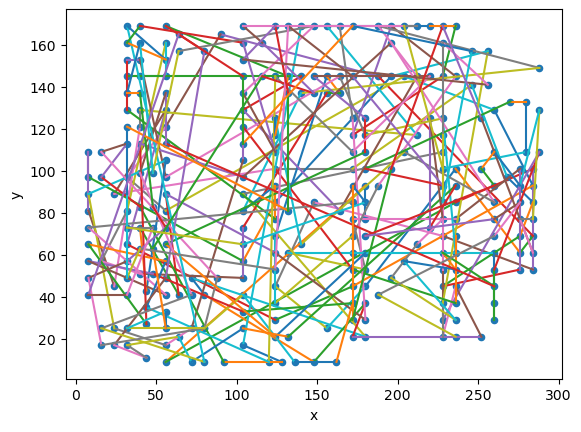

In [17]:
distances4 = []
for path in solutions4:
    length = path_length(path, city_coordinates2)
    distances4.append(length)
    print(length)
    
show_path(city_coordinates2, solutions4[4])

### 2-opt algorithm

In [16]:
def two_opt_swap(path, one, two):
    new_path = [0] * len(path)
    new_path[0:one+1] = path[0:one+1]
    middle = path[one+1:two+1]
    middle.reverse()
    new_path[one+1:two] = middle
    new_path[two+1:] = path[two+1:]
    return new_path

In [17]:
import sys
def local_search_2opt(path, coordinates):
    new_fitness = sys.maxsize
    best_fitness = fitness(path, coordinates)
    best_path = path
    improved = True
    counter = 0
    while improved:
        improved = False
        counter += 1
        for i in range(len(best_path)-1):
            for j in range(i+1, len(best_path)):
                new_path = two_opt_swap(best_path, i, j)
                new_fitness = fitness(new_path, coordinates)
                if new_fitness > best_fitness:
                    best_path = new_path
                    best_fitness = new_fitness
                    improved = True
                    break
            if improved == True:
                break
    return best_path, best_fitness

In [18]:
#Local search only: 
solutions_ma_l = []

for i in range(10):
    number_cities = len(city_coordinates)
    N = 10
    population = [generate_path(number_cities) for c in range(N)]
    epochs = 0
    best_fitness, best_solution = find_best_solution(population, city_coordinates)
    for path in range(len(population)):
        best_path, best_fitness = local_search_2opt(population[path], city_coordinates)
        population[path] = best_path
    best_fitness, best_solution = find_best_solution(population, city_coordinates)
    solutions_ma_l.append(best_solution)
    print(best_fitness)
    print(best_solution)

0.008552356270551323
[47, 46, 44, 41, 39, 34, 33, 31, 24, 21, 25, 19, 23, 26, 30, 29, 32, 36, 40, 28, 20, 13, 8, 14, 17, 22, 16, 3, 6, 12, 18, 11, 10, 2, 4, 1, 5, 7, 9, 15, 27, 35, 38, 37, 43, 42, 45, 0, 49, 48]
0.008501070084886812
[32, 29, 30, 26, 25, 23, 22, 19, 16, 17, 14, 8, 13, 20, 28, 40, 36, 46, 47, 44, 41, 39, 45, 42, 43, 0, 49, 48, 27, 35, 38, 37, 34, 33, 31, 24, 21, 18, 12, 6, 3, 11, 10, 15, 9, 7, 5, 4, 2, 1]
0.008674206069026743
[37, 34, 33, 31, 24, 21, 18, 25, 26, 30, 32, 29, 22, 23, 19, 16, 17, 14, 8, 13, 20, 28, 40, 36, 46, 47, 44, 45, 41, 39, 42, 43, 0, 49, 48, 38, 35, 27, 15, 9, 7, 5, 1, 4, 2, 10, 11, 12, 6, 3]
0.008746669046238704
[48, 49, 0, 43, 37, 38, 35, 27, 15, 9, 7, 5, 1, 4, 2, 10, 11, 12, 6, 3, 8, 14, 13, 20, 28, 32, 29, 30, 26, 25, 23, 22, 17, 16, 19, 18, 21, 24, 31, 33, 34, 39, 42, 45, 41, 44, 47, 46, 36, 40]
0.008674206069026743
[37, 34, 33, 31, 24, 21, 18, 25, 26, 30, 32, 29, 22, 23, 19, 16, 17, 14, 8, 13, 20, 28, 40, 36, 46, 47, 44, 45, 41, 39, 42, 43, 0, 

116.92684078694671
117.63224982438366
115.2843259708495
114.32923718887318
115.2843259708495
121.71552654270369
116.92684078694671
114.55499500732313
116.87114488134148
117.02191695177726


C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point1_x = float(point1["x"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point1_y = float(point1["y"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point2_x = float(point2["x"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point2_y = float(point2["y"])


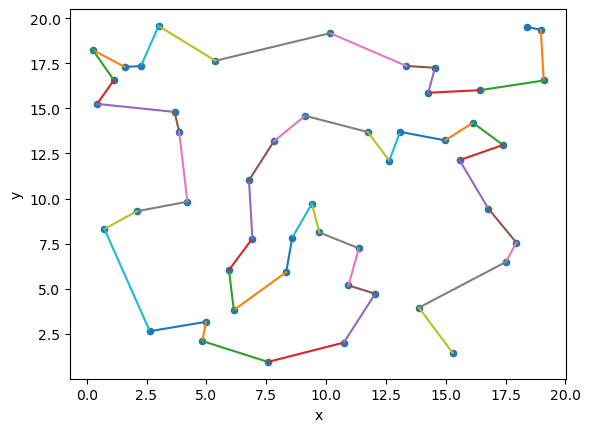

In [24]:
distances_ma_l = []
for path in solutions_ma_l:
    length = path_length(path, city_coordinates)
    distances_ma_l.append(length)
    print(length)
    
show_path(city_coordinates, solutions_ma_l[3])

In [ ]:
#Local search a280 only:
#Code in theory working but takes extremely long to execute and requires a large amount of memory
solutions_ma_a = []

for i in range(10):
    number_cities = len(city_coordinates2)
    N = 10
    population = [generate_path(number_cities) for c in range(N)]
    epochs = 0
    best_fitness, best_solution = find_best_solution(population, city_coordinates2)
    for path in range(len(population)):
        best_path, best_fitness = local_search_2opt(population[path], city_coordinates2)
        population[path] = best_path
    best_fitness, best_solution = find_best_solution(population, city_coordinates2)
    solutions_ma_a.append(best_solution)
    print(best_fitness)
    print(best_solution)

### Memetic algorithm using 2-opt for local search

In [19]:
def memetic_simulation(N, number_cities, generations, coordinates, K, mu, pc):
    population = [generate_path(number_cities) for c in range(N)]
    epochs = 0
    retVal1, retVal2 = find_best_solution(population, coordinates)
    for path in range(len(population)):
        best_path, best_fitness = local_search_2opt(population[path], coordinates)
        population[path] = best_path
    retVal1, retVal2 = find_best_solution(population, coordinates)
    while epochs < generations:
        new_generation = []
        for i in range(int(N/2)):
            parent1 = select_parent(population, K, coordinates)
            parent2 = select_parent(population, K, coordinates)
            new_generation.extend(generate_children(parent1, parent2, mu, pc))
        for path in range(len(new_generation)):
            best_path, best_fitness = local_search_2opt(new_generation[path], coordinates)
            new_generation[path] = best_path
        population = new_generation
        epochs += 1

    best_fitness, best_solution = find_best_solution(population, coordinates)
    return best_fitness, best_solution

In [22]:
#MA with 10 generation
solutions_ma = []
fitnesses_ma = []

for i in range(10):
    number_cities = len(city_coordinates)
    N = 10
    generations = 10
    K = 2
    mu = 0.2
    pc = 1

    best_fitness, best_solution = memetic_simulation(N, number_cities, generations, city_coordinates, K, mu, pc)
    solutions_ma.append(best_solution)
    fitnesses_ma.append(best_fitness)
    print(best_fitness)
    print(best_solution)

0.008674206069026743
[37, 34, 33, 31, 24, 21, 18, 25, 26, 30, 32, 29, 22, 23, 19, 16, 17, 14, 8, 13, 20, 28, 40, 36, 46, 47, 44, 45, 41, 39, 42, 43, 0, 49, 48, 38, 35, 27, 15, 9, 7, 5, 1, 4, 2, 10, 11, 12, 6, 3]
0.008635686546817532
[17, 16, 19, 23, 22, 29, 32, 30, 26, 25, 18, 21, 24, 31, 34, 33, 41, 39, 42, 45, 44, 47, 46, 36, 40, 28, 20, 13, 14, 8, 3, 6, 12, 11, 10, 2, 4, 1, 5, 7, 9, 15, 27, 35, 38, 37, 43, 0, 49, 48]
0.008527283933588654
[9, 7, 5, 1, 4, 2, 11, 10, 15, 27, 35, 37, 38, 48, 49, 0, 43, 42, 45, 41, 39, 34, 31, 33, 44, 47, 46, 40, 36, 30, 29, 32, 28, 20, 13, 8, 14, 17, 16, 19, 22, 23, 26, 25, 24, 21, 18, 12, 6, 3]
0.008636118745712566
[17, 16, 19, 22, 23, 26, 25, 18, 21, 24, 31, 33, 34, 39, 42, 45, 41, 44, 47, 46, 40, 36, 30, 29, 32, 28, 20, 13, 14, 8, 3, 6, 12, 11, 10, 2, 4, 1, 5, 7, 9, 15, 27, 35, 38, 37, 43, 0, 49, 48]
0.008692863028058904
[17, 16, 19, 23, 22, 30, 26, 25, 18, 21, 24, 31, 33, 34, 39, 42, 45, 41, 44, 47, 46, 40, 36, 32, 29, 28, 20, 13, 14, 8, 3, 6, 12, 1

115.2843259708495
115.79855227243341
117.27063479861825
115.7927570757933
115.03689828911264
114.41283333115496
114.32923718887318
116.30869950855077
114.87365549753612
114.87365549753612


C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point1_x = float(point1["x"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point1_y = float(point1["y"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point2_x = float(point2["x"])
C:\Users\Aliza\AppData\Local\Temp\ipykernel_3128\3750131850.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  point2_y = float(point2["y"])


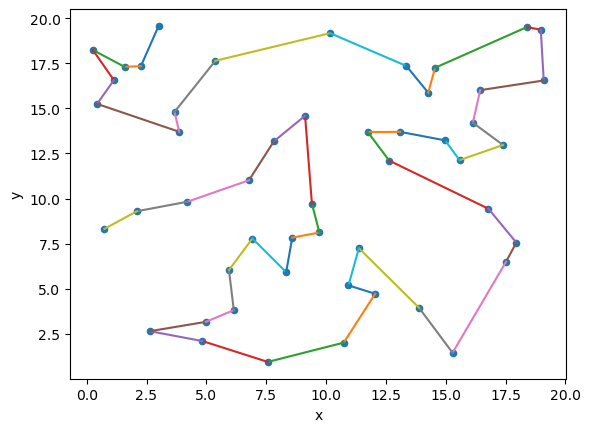

In [23]:
distances_ma = []
for path in solutions_ma:
    length = path_length(path, city_coordinates)
    distances_ma.append(length)
    print(length)
    
show_path(city_coordinates, solutions_ma[2])

In [ ]:
#MA with 10 generation and a280 dataset
#Code in theory working but takes extremely long to execute and requires a large amount of memory
solutions_ma2 = []
fitnesses_ma2 = []

for i in range(10):
    number_cities = len(city_coordinates2)
    N = 10
    generations = 10
    K = 2
    mu = 0.2
    pc = 1

    best_fitness, best_solution = memetic_simulation(N, number_cities, generations, city_coordinates2, K, mu, pc)
    solutions_ma2.append(best_solution)
    fitnesses_ma2.append(best_fitness)
    print(best_fitness)
    print(best_solution)

### Analysis code

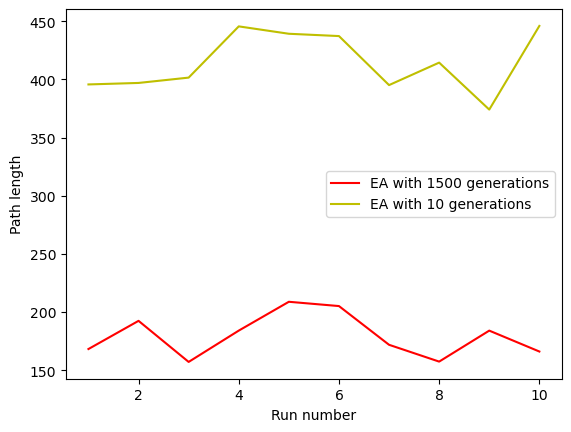

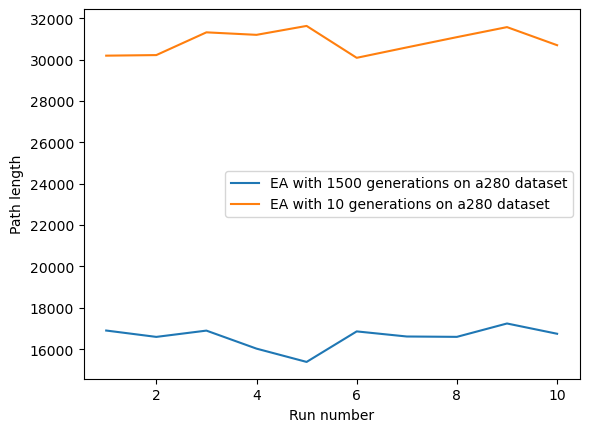

In [29]:
x = [1,2,3,4,5,6,7,8,9,10]

plt.plot(x, distances1, color='r', label="EA with 1500 generations")
plt.plot(x, distances2, color='y', label="EA with 10 generations")
plt.xlabel("Run number")
plt.ylabel("Path length")
plt.legend()
plt.show()

plt.plot(x, distances4, label="EA with 1500 generations on a280 dataset")
plt.plot(x, distances3, label="EA with 10 generations on a280 dataset")
plt.xlabel("Run number")
plt.ylabel("Path length")
plt.legend()
plt.show()

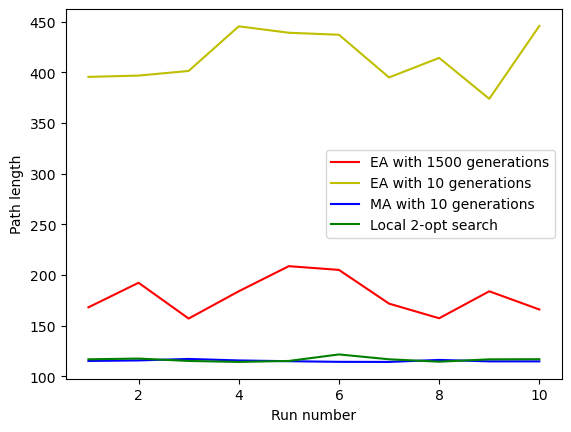

In [30]:
x = [1,2,3,4,5,6,7,8,9,10]

plt.plot(x, distances1, color='r', label="EA with 1500 generations")
plt.plot(x, distances2, color='y', label="EA with 10 generations")
plt.plot(x, distances_ma, color='b', label="MA with 10 generations")
plt.plot(x, distances_ma_l, color='g', label="Local 2-opt search")
plt.xlabel("Run number")
plt.ylabel("Path length")
plt.legend()
plt.show()

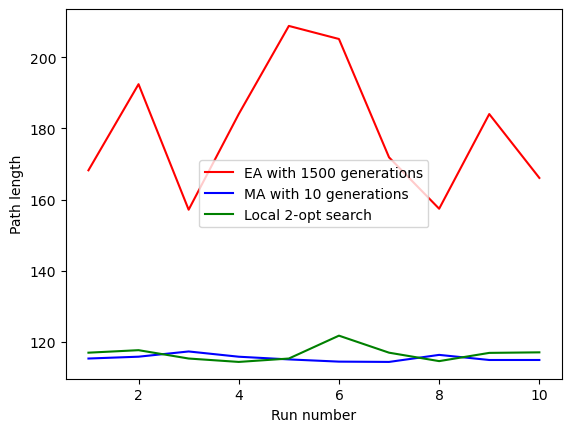

In [31]:
x = [1,2,3,4,5,6,7,8,9,10]

plt.plot(x, distances1, color='r', label="EA with 1500 generations")
#plt.plot(x, distances2, color='y', label="EA with 10 generations")
plt.plot(x, distances_ma, color='b', label="MA with 10 generations")
plt.plot(x, distances_ma_l, color='g', label="Local 2-opt search")
plt.xlabel("Run number")
plt.ylabel("Path length")
plt.legend()
plt.show()